Epochs:   5%|▌         | 1/20 [00:03<01:03,  3.35s/it]

Epoch 0, Loss: 0.05828809, Train acc: 0.85, Test acc: 0.90, Val acc: 0.85


Epochs:  10%|█         | 2/20 [00:06<00:58,  3.25s/it]

Epoch 1, Loss: 0.04140580, Train acc: 0.89, Test acc: 0.92, Val acc: 0.89


Epochs:  15%|█▌        | 3/20 [00:09<00:55,  3.28s/it]

Epoch 2, Loss: 0.03520050, Train acc: 0.90, Test acc: 0.93, Val acc: 0.90


Epochs:  20%|██        | 4/20 [00:13<00:52,  3.27s/it]

Epoch 3, Loss: 0.03116411, Train acc: 0.91, Test acc: 0.94, Val acc: 0.91


Epochs:  25%|██▌       | 5/20 [00:16<00:48,  3.23s/it]

Epoch 4, Loss: 0.02874041, Train acc: 0.92, Test acc: 0.94, Val acc: 0.91


Epochs:  30%|███       | 6/20 [00:19<00:45,  3.25s/it]

Epoch 5, Loss: 0.02639059, Train acc: 0.92, Test acc: 0.94, Val acc: 0.92


Epochs:  35%|███▌      | 7/20 [00:22<00:42,  3.27s/it]

Epoch 6, Loss: 0.02505302, Train acc: 0.93, Test acc: 0.95, Val acc: 0.92


Epochs:  40%|████      | 8/20 [00:26<00:39,  3.26s/it]

Epoch 7, Loss: 0.02438310, Train acc: 0.93, Test acc: 0.95, Val acc: 0.92


Epochs:  45%|████▌     | 9/20 [00:29<00:35,  3.27s/it]

Epoch 8, Loss: 0.02229096, Train acc: 0.93, Test acc: 0.95, Val acc: 0.93


Epochs:  50%|█████     | 10/20 [00:32<00:32,  3.29s/it]

Epoch 9, Loss: 0.02142437, Train acc: 0.93, Test acc: 0.95, Val acc: 0.93


Epochs:  55%|█████▌    | 11/20 [00:36<00:29,  3.30s/it]

Epoch 10, Loss: 0.02138960, Train acc: 0.94, Test acc: 0.95, Val acc: 0.94


Epochs:  60%|██████    | 12/20 [00:39<00:26,  3.29s/it]

Epoch 11, Loss: 0.02042242, Train acc: 0.94, Test acc: 0.95, Val acc: 0.93


Epochs:  65%|██████▌   | 13/20 [00:42<00:22,  3.26s/it]

Epoch 12, Loss: 0.01916306, Train acc: 0.94, Test acc: 0.96, Val acc: 0.93


Epochs:  70%|███████   | 14/20 [00:45<00:19,  3.22s/it]

Epoch 13, Loss: 0.01901797, Train acc: 0.94, Test acc: 0.96, Val acc: 0.94


Epochs:  75%|███████▌  | 15/20 [00:48<00:16,  3.20s/it]

Epoch 14, Loss: 0.01935805, Train acc: 0.94, Test acc: 0.95, Val acc: 0.93


Epochs:  75%|███████▌  | 15/20 [00:50<00:16,  3.39s/it]

[np.float64(0.02194548519396323), np.float64(0.022162213665578755), np.float64(0.022377834512488714), np.float64(0.022795770884150114)]
early stopping.


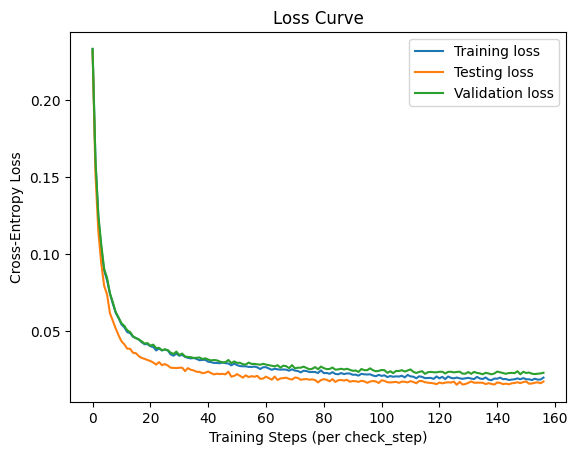

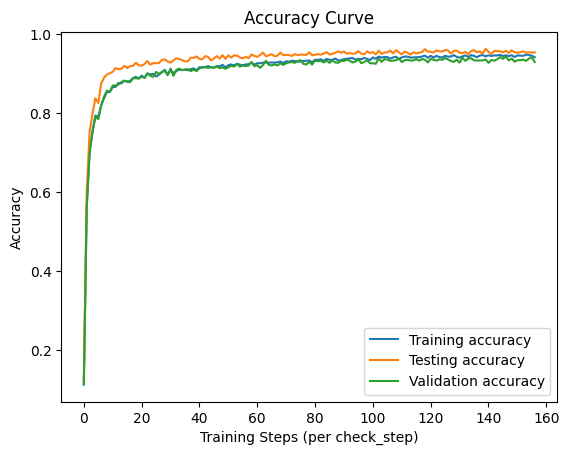

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def should_early_stop(validation_loss, num_steps=3):
    if len(validation_loss) < num_steps + 1:
        return False

    is_increasing = [validation_loss[i] <= validation_loss[i + 1] for i in range(-num_steps - 1, -1)]
    return sum(is_increasing) == len(is_increasing)


def train_val_split(X, Y, val_percentage):
    """
      Selects samples from the dataset randomly to be in the validation set. Also, shuffles the train set.
      --
      X: [N, num_features] numpy vector,
      Y: [N, 1] numpy vector
      val_percentage: amount of data to put in validation set
    """
    dataset_size = X.shape[0]
    idx = np.arange(0, dataset_size)
    np.random.shuffle(idx)

    train_size = int(dataset_size * (1 - val_percentage))
    idx_train = idx[:train_size]
    idx_val = idx[train_size:]
    X_train, Y_train = X[idx_train], Y[idx_train]
    X_val, Y_val = X[idx_val], Y[idx_val]
    return X_train, Y_train, X_val, Y_val


def onehot_encode(Y, n_classes=10):
    onehot = np.zeros((Y.shape[0], n_classes))
    onehot[np.arange(0, Y.shape[0]), Y] = 1
    return onehot


def bias_trick(X):
    return np.concatenate((X, np.ones((len(X), 1))), axis=1)


def check_gradient(X, targets, w, epsilon, computed_gradient, w2, w3):
    print("Checking gradient...")
    dw = np.zeros_like(w)
    for k in range(w.shape[0]):
        for j in range(w.shape[1]):
            new_weight1, new_weight2 = np.copy(w), np.copy(w)
            new_weight1[k, j] += epsilon
            new_weight2[k, j] -= epsilon
            loss1 = cross_entropy_loss(X, targets, new_weight1, w2, w3)
            loss2 = cross_entropy_loss(X, targets, new_weight2, w2, w3)
            dw[k, j] = (loss1 - loss2) / (2 * epsilon)
    maximum_abosulte_difference = abs(computed_gradient - dw).max()
    assert maximum_abosulte_difference <= epsilon ** 2, "Absolute error was: {}".format(maximum_abosulte_difference)


def softmax(a):
    a_exp = np.exp(a)
    return a_exp / a_exp.sum(axis=1, keepdims=True)


def forward(X, w):
    a = X.dot(w.T) #raw output
    return softmax(a)


def add_layer(X, w, activation_fnc):
    Zj = X.dot(w.T)
    if activation_fnc == "tanh":
        Aj = tanh(Zj)
    elif activation_fnc == "ReLU":
        Aj = ReLU(Zj)
    else:
        Aj = sigmoid(Zj)
    return Aj, Zj


def forward_hidden(X, w1, w2, w3, activation_fnc="tanh"):
    A1, Z1 = add_layer(X, w1, activation_fnc)
    A1 = dropout(A1)
    A2, Z2 = add_layer(A1, w2, activation_fnc)
    A2 = dropout(A2)
    y_hat = forward(A2, w3)
    return A1, Z1, A2, Z2, y_hat, activation_fnc


def dropout(A, drop_prob=0.1):
    keep_prop = 1 - drop_prob
    mask = np.random.rand(A.shape[0], A.shape[1])
    mask = mask < keep_prop
    if drop_prob > 0.0:
        scale = 1/keep_prop
    else:
        scale = 1.0
    return mask * A * scale


def weight_initialization(input_units, output_units, uniform=True):
    weight_shape = (output_units, input_units)
    if uniform:
        return np.random.uniform(-1, 1, weight_shape)
    else:
        return np.random.normal(0, 1 / (np.sqrt(input_units)), weight_shape)


def sigmoid(z):
    f = 1 / (1 + np.exp(-z))
    return f


def sigmoid_derivative(a):
    return a*(1 - a)


def tanh(z):
    return np.tanh(z)


def tanh_derivative(a):
    return 1 - a**2


def ReLU(x):
    return x*(x > 0)


def ReLU_derivative(x):
    return 1. * (x > 0)


def calculate_accuracy(X, targets, w1, w2, w3):
    _, _, _, _, output, _ = forward_hidden(X, w1, w2, w3)
    predictions = output.argmax(axis=1)
    targets = targets.argmax(axis=1)
    return (predictions == targets).mean()


def cross_entropy_loss(X, targets, w1, w2, w3):
    _, _, _, _, output, _ = forward_hidden(X, w1, w2, w3)
    assert output.shape == targets.shape
    # output[output == 0] = 1e-8
    log_y = np.log(output)
    cross_entropy = -targets * log_y
    # print(cross_entropy.shape)
    return cross_entropy.mean()


def add_layer_backprop(A_prev, A, Z, w, Y, delta_prev, activation_fnc, last=False):
    if last:
        delta = A - Y #derivative of cross-entropy loss and softmax
        dw = delta.T.dot(A_prev)
    else:
        if activation_fnc == "tanh":
            w_k_delta = delta_prev.dot(w)
            delta = tanh_derivative(A) * w_k_delta
            dw = delta.T.dot(A_prev)
        elif activation_fnc == "ReLU":
            w_k_delta = delta_prev.dot(w)
            delta = ReLU_derivative(A) * w_k_delta
            dw = delta.T.dot(A_prev)
        else:
            w_k_delta = delta_prev.dot(w)
            delta = sigmoid_derivative(A) * w_k_delta
            dw = delta.T.dot(A_prev)
    return dw, delta


#   Activation function = tanh
def backpropagation(X, Y, w1, w2, w3, learning_rate, should_check_gradient):
    normalization_factor = X.shape[0] * Y.shape[1]  # batch_size * num_classes
    A1, Z1, A2, Z2, y_hat, a = forward_hidden(X, w1, w2, w3)

    dw3, delta_k = add_layer_backprop(A2, y_hat, None, None, Y, None, None, last=True)
    dw2, delta_j = add_layer_backprop(A1, A2, Z2, w3, None, delta_k, "tanh")
    dw1, _ = add_layer_backprop(X, A1, Z1, w2, None, delta_j, "tanh")

    dw1 = dw1 / normalization_factor
    dw2 = dw2 / normalization_factor
    dw3 = dw3 / normalization_factor

    assert dw1.shape == w1.shape, "dw1 shape was: {}. Expected: {}".format(dw1.shape, w1.shape)
    assert dw2.shape == w2.shape, "dw2 shape was: {}. Expected: {}".format(dw2.shape, w2.shape)
    assert dw3.shape == w3.shape, "dw3 shape was: {}. Expected: {}".format(dw3.shape, w3.shape)

    if should_check_gradient:
        check_gradient(X, Y, w1, 1e-2, dw1, w2, w3)

    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    w3 = w3 - learning_rate * dw3

    return w1, w2, w3

import pandas as pd

mnisttrain=pd.read_csv("mnist_train.csv")
mnisttest=pd.read_csv("mnist_test.csv")
X_train=mnisttrain.iloc[:,1:]
Y_train=mnisttrain.iloc[:,0]
X_test=mnisttest.iloc[:,1:]
Y_test=mnisttest.iloc[:,0]

X_train = X_train[:20000]
Y_train = Y_train[:20000]
X_test = X_test[X_test.shape[0]-2000:]
Y_test = Y_test[Y_test.shape[0]-2000:]

# Pre-process data
X_train, X_test = (X_train / 127.5) - 1, (X_test / 127.5) - 1
X_train = bias_trick(X_train)
X_test = bias_trick(X_test)
Y_train, Y_test = onehot_encode(Y_train), onehot_encode(Y_test)

X_train, Y_train, X_val, Y_val = train_val_split(X_train, Y_train, 0.1)

# Hyperparameters
batch_size = 128
learning_rate = 0.5
num_batches = X_train.shape[0] //batch_size
should_gradient_check = False
check_step = num_batches //10
max_epochs = 20
n_h = 64

# Tracking variables
TRAIN_LOSS = []
TEST_LOSS = []
VAL_LOSS = []
TRAIN_ACC = []
TEST_ACC = []
VAL_ACC = []


def train_loop():
    w1 = weight_initialization(X_train.shape[1], n_h, uniform=False)
    w2 = weight_initialization(n_h, n_h, uniform=False)
    w3 = weight_initialization(n_h, Y_train.shape[1], uniform=False)
    for e in tqdm(range(max_epochs), desc="Epochs"):  # Epochs
        for i in range(num_batches):
            X_batch = X_train[i * batch_size:(i + 1) * batch_size]
            Y_batch = Y_train[i * batch_size:(i + 1) * batch_size]

            w1, w2, w3 = backpropagation(X_batch, Y_batch, w1, w2, w3, learning_rate, should_gradient_check)

            if i % check_step == 0:
                # Loss
                TRAIN_LOSS.append(cross_entropy_loss(X_train, Y_train, w1, w2, w3))
                TEST_LOSS.append(cross_entropy_loss(X_test, Y_test, w1, w2, w3))
                VAL_LOSS.append(cross_entropy_loss(X_val, Y_val, w1, w2, w3))

                TRAIN_ACC.append(calculate_accuracy(X_train, Y_train,  w1, w2, w3))
                VAL_ACC.append(calculate_accuracy(X_val, Y_val,  w1, w2, w3))
                TEST_ACC.append(calculate_accuracy(X_test, Y_test,  w1, w2, w3))
                if should_early_stop(VAL_LOSS):
                    print(VAL_LOSS[-4:])
                    print("early stopping.")
                    return w1, w2, w3
        if e % 1 == 0:
            print("Epoch %d, Loss: %.8f, Train acc: %.2f, Test acc: %.2f, Val acc: %.2f"
                  % (e, TRAIN_LOSS[-1], TRAIN_ACC[-1], TEST_ACC[-1], VAL_ACC[-1]))
    return w1, w2, w3


w1, w2, w3 = train_loop()

plt.plot(TRAIN_LOSS, label="Training loss")
plt.plot(TEST_LOSS, label="Testing loss")
plt.plot(VAL_LOSS, label="Validation loss")
plt.title("Loss Curve")
plt.xlabel("Training Steps (per check_step)")
plt.ylabel("Cross-Entropy Loss")
plt.legend()
plt.show()

plt.clf()
plt.plot(TRAIN_ACC, label="Training accuracy")
plt.plot(TEST_ACC, label="Testing accuracy")
plt.plot(VAL_ACC, label="Validation accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Training Steps (per check_step)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()